<a href="https://colab.research.google.com/github/CoAxLab/Data-Explorations/blob/main/book/exercises/resampling-methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 13:  Resampling methods

This homework assignment is designed to give you practice with bootstrapping and permutation tests.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository.

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading & Visualizing the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file.

(a) Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`, self reported at time of data collection), Flanker Task performance (`Flanker_Unadj`), total intracranial volume (`FS_IntraCranial_Vol`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame.

In [ ]:
# WRITE YOUR CODE HERE
#install.packages("ISLR")
#install.packages("boot")
library(ISLR)
library(boot)
library(tidyverse)

system("gdown --id 1hywRmGdvhbDYTrQRyl1_bLJsq-T3GJq2")

df = read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")
d1 = df %>%
      select(Subject, Gender, Flanker_Unadj, FS_IntraCranial_Vol, FS_Tot_WM_Vol, FS_Total_GM_Vol) %>%
      drop_na()

  head(d1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>
1,100206,M,130.42,1864518,543134,807245
2,100307,F,112.56,1512540,407292,664124
3,100408,M,121.18,1684117,500417,726206
4,100610,M,126.53,1816044,512946,762308
5,101006,F,101.85,1437868,429449,579632
6,101107,M,107.04,1512727,416995,665024


(b) Plot grey matter volume (x axis) against intracranial volume (y axis) and Gender (point color).

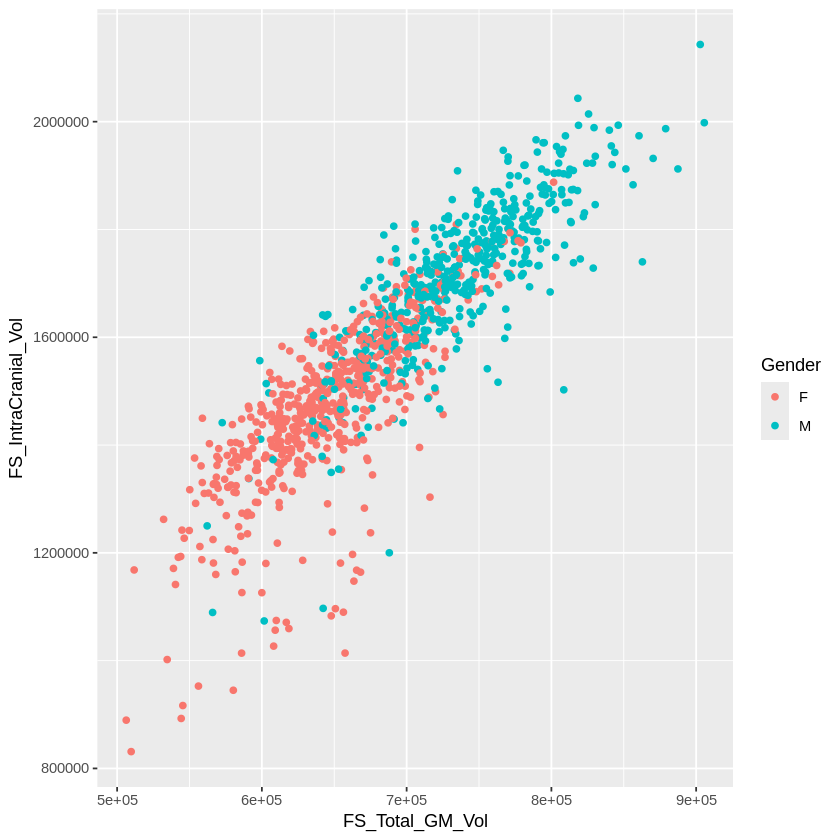

In [ ]:
# WRITE YOUR CODE HERE

d1 %>%
  ggplot(aes(x = FS_Total_GM_Vol, y = FS_IntraCranial_Vol, col = Gender)) + geom_point()

What patterns do you observe in the scatter plot?

> *There is a positive correlation between Grey Matter and Intracranial volume. Men tend to sit at the higher end of this correlation and women tend to sit at the lower end of this correlation.*
>

---
## 2. Logistic classifier (2 points)

We want to try predicting gender using the neural data you have loaded.

(a) Run a logisic regression model to predict gender from total white matter volume, total grey matter volume, and intracranial volume.

In [ ]:
# WRITE YOUR CODE HERE
d1 = d1 %>%
  mutate(Gender = case_when(
   Gender == "M" ~ 0,
   Gender == "F" ~ 1)) %>%
   mutate(Gender = as.factor(Gender))
head(d1)
model1 = glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, family = binomial, data = d1)
summary(model1)

,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<fct>,<dbl>,<dbl>,<int>,<int>
1,100206,0,130.42,1864518,543134,807245
2,100307,1,112.56,1512540,407292,664124
3,100408,0,121.18,1684117,500417,726206
4,100610,0,126.53,1816044,512946,762308
5,101006,1,101.85,1437868,429449,579632
6,101107,0,107.04,1512727,416995,665024



Call:
glm(formula = Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, 
    family = binomial, data = d1)

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          2.262e+01  1.347e+00  16.787  < 2e-16 ***
FS_Tot_WM_Vol       -2.140e-06  3.059e-06  -0.699    0.484    
FS_Total_GM_Vol     -1.959e-05  3.145e-06  -6.229 4.70e-10 ***
FS_IntraCranial_Vol -5.020e-06  1.177e-06  -4.263 2.01e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  919.85  on 1109  degrees of freedom
AIC: 927.85

Number of Fisher Scoring iterations: 5


Which factors are signficantly associated with gender?

> *Both total grey matter volume and total intracranial volume are significantly associated with Gender.*
>




(b) Estimate the prediction accuracy of your model (Note: this is the training set accuracy). Set your prediction threshold to 0.5.

In [15]:
# WRITE YOUR CODE HERE
## mean of actual - mean of predicted
d1$predicted = predict(model1, type = "response")

d1$pred_class = ifelse(d1$predicted > 0.5, 1, 0)

accuracy <- mean(d1$pred_class == d1$Gender)

accuracy



[1] 0.8203055

,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol,predicted,pred_class
,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,100206,0,130.42,1864518,543134,807245,0.02366135,0
2,100307,1,112.56,1512540,407292,664124,0.75792878,1
3,100408,0,121.18,1684117,500417,726206,0.24316721,0
4,100610,0,126.53,1816044,512946,762308,0.07366525,0
5,101006,1,101.85,1437868,429449,579632,0.95787337,1
6,101107,0,107.04,1512727,416995,665024,0.75063972,1


What is the prediction accuracy for gender from the full model?

*82% prediction accuracy for the full model*
>

---
## 3. Bootstrapped accuracy (3 points)

Use bootstrapping to estimate the confidence intervals of the _prediction accuracy_ of your model (i.e., the confidence of the correlation between $\hat{y}$ and $y$). Plot the histogram of the bootstrapped prediction accuracies and estimate the confidence intervals off of the standard deviation from the bootstrap.


[1] 0.7946492

[1] 0.8443373

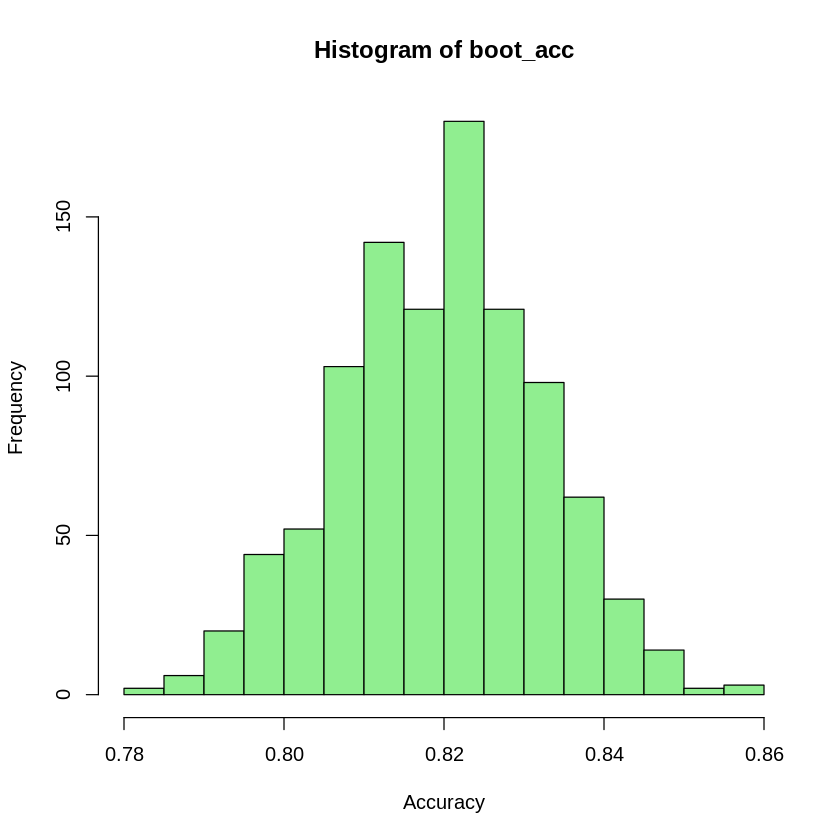

In [10]:
# WRITE YOUR CODE HERE
set.seed(101)
boots = 1000
boot_acc = numeric(boots)

for(i in 1:boots){
  boot_sample = d1[sample(1:nrow(d1), replace = TRUE), ]
  boot_model = glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol,
                    family = binomial, data = boot_sample)
  boot_sample$predicted <- predict(boot_model, type = "response")
  boot_sample$pred_class <- ifelse(boot_sample$predicted > 0.5, 1, 0)

  # Compute accuracy
  boot_acc[i] <- mean(boot_sample$pred_class == boot_sample$Gender)
}

ci_low = mean(boot_acc) - 1.96 * sd(boot_acc)
ci_up = mean(boot_acc) + 1.96 * sd(boot_acc)
ci_low
ci_up
hist(boot_acc, xlab = "Accuracy", col = "lightgreen", border = "black")


How robust is the prediction accuracy of the full model?

> *Since the CI is fairly narrow, the prediction accuracy of the full model is pretty robust*
>

---
## 4. Permutation test for grey matter effects (3 points)

Now run a permutation test, with 1000 iterations, to evaluate how much grey matter volume contributes to the prediction accuracy. Compare the prediction accuracy of the full (unpermuted model) with the distribution of accuracies you get with a randomized grey matter volume term using a histogram (Hint: use the `abline` function to show the original accuracy on the histogram).

[1] 0.8050314

[1] 0

[1] 0.5444744 0.5444744 0.5417790 0.5435759 0.5444744 0.5444744

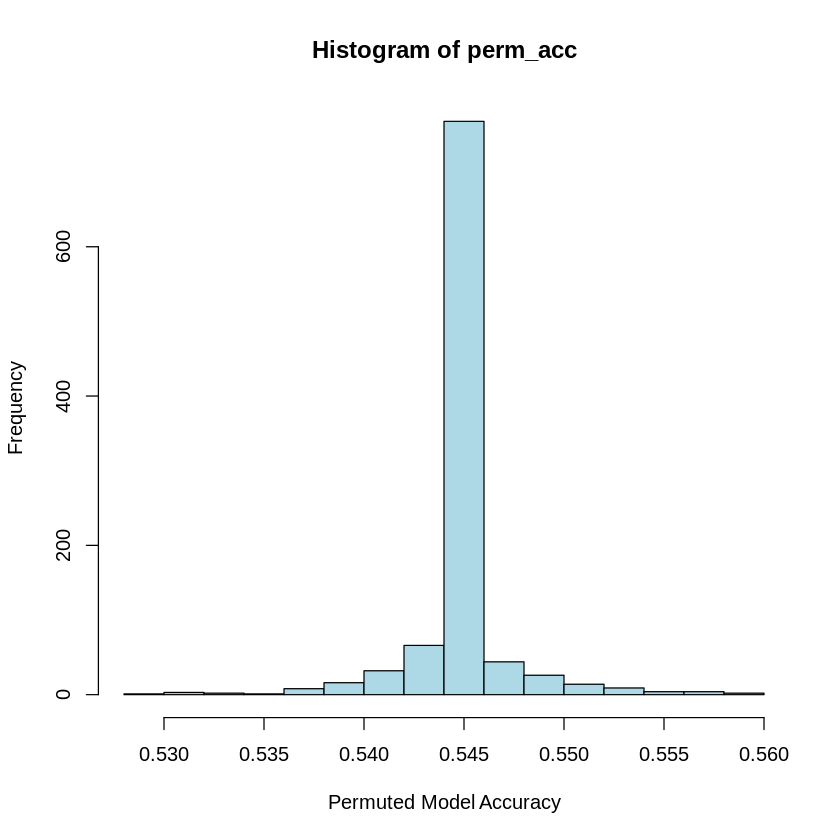

In [23]:
# WRITE YOUR CODE HERE
set.seed(123)

R = 1000
perm_acc = numeric(R)

d2_perm = d1



for (i in 1:R) {


  d2_perm$FS_Total_GM_Vol = sample(d2_perm$FS_Total_GM_Vol)


  perm_mod = glm(as.factor(Gender) ~ FS_Total_GM_Vol, data = d2_perm, family = binomial)


  d2_perm$predicted = predict(perm_mod, type = "response")
  d2_perm$pred_class = ifelse(d2_perm$predicted > 0.5, 1, 0)


  perm_acc[i] = mean(d2_perm$pred_class == d2_perm$Gender)
}

hist(perm_acc, col = "lightblue", border = "black", xlab = "Permuted Model Accuracy")

original_mod_GM = glm(as.factor(Gender) ~ FS_Total_GM_Vol, data = d1, family = binomial)
d1$predicted = predict(original_mod_GM, type = "response")
d1$pred_class = ifelse(d1$predicted > 0.5, 1, 0)
original_accuracy = mean(d1$pred_class == d1$Gender)
abline(v = original_accuracy)
original_accuracy
eval = mean(perm_acc >= original_accuracy)
eval


**How** much does the grey matter volume influence the prediction accuracy of the model?

> *Grey matter has a notable influence on prediction accuracy*
>

---
## 5. Reflection (1 point)

Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

* A permutation test is generating a null distribution based on the data you have whereas bootstrapping is used to evaluate the uncertainty of an estimate and do hypothesis testing when you fail to meet parametric testing assumptions.*
>

**DUE:** 5pm EST, March 27, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*